In [1]:
#!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
dtype_dict = dict(zip(range(13, 14898), ['float32' for _ in range(13, 14898)]))
weather_df = pd.read_csv("transposed_daily_temperature_1000_cities_1980_2020.csv", low_memory=False,
                              dtype=dtype_dict)
weather_df.columns = weather_df.columns[:13].union(pd.to_datetime(weather_df.columns[13:]), sort=False)
weather_df.set_index("city", inplace=True)


In [35]:
def city_temperature(weather_df, city, start, end, freq, inclusive):
    time_range = pd.date_range(start=start, end=end, freq=freq, inclusive=inclusive)
    weather_df = weather_df[time_range]
    return weather_df.loc[city]


In [37]:
#Suppose that we want to see the temperature of Terhan and Tokyo for 10 consecutive days since 1980
city_temperature(weather_df,["Tehran", "Tokyo", "New York"] ,'1/1/1980', '1/10/1980', 'D', 'both')

,1980-01-01 00:00:00,1980-01-02 00:00:00,1980-01-03 00:00:00,1980-01-04 00:00:00,1980-01-05 00:00:00,1980-01-06 00:00:00,1980-01-07 00:00:00,1980-01-08 00:00:00,1980-01-09 00:00:00,1980-01-10 00:00:00
city,,,,,,,,,,
Tehran,-4.54,-3.00,-1.02,-1.69,0.39,1.28,-3.05,-5.74,-6.62,-5.00
Tokyo,4.16,4.06,7.12,9.23,3.20,7.01,3.21,2.03,4.49,5.94
New York,1.48,1.00,-3.23,-1.81,-4.31,-0.79,1.18,-1.72,-2.94,3.85


In [38]:
#We can also plot temperature  
ax = city_temperature(weather_df,"Tehran" ,'1/1/1980','1/10/1981', 'D').plot()
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (C)")
plt.show()

TypeError: city_temperature() missing 1 required positional argument: 'inclusive'

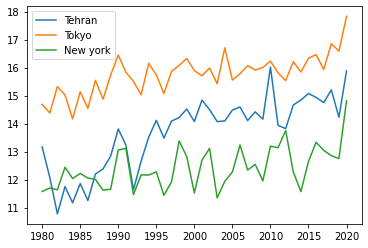

In [57]:
from datetime import date

end_date =  date(2020, 9, 30)

def add_years(d, years):
    """Return a date that's `years` years after the date (or datetime)
    object `d`. Return the same calendar date (month and day) in the
    destination year, if it exists, otherwise use the following day
    (thus changing February 29 to March 1).

    """
    if d.replace(year = d.year + years) >= end_date:
        return end_date
    try:
        return d.replace(year = d.year + years)
    except ValueError:
        return d + (date(d.year + years, 1, 1) - date(d.year, 1, 1))

start_date = date(1980, 1, 1)

'''
With data time functions now we can easily calculate the mean for a year.  
'''
[city_temperature(weather_df,"Tehran" ,add_years(start_date, 0+x), add_years(start_date, 1+x), 'D', 'left') for x in range(0, 41)]

tehran_yearly_mean = [city_temperature(weather_df,"Tehran" ,add_years(start_date, 0+x), add_years(start_date, 1+x), 'D', 'left').mean() for x in range(0, 41)]
tokyo_yearly_mean = [city_temperature(weather_df,"Tokyo" ,add_years(start_date, 0+x), add_years(start_date, 1+x), 'D', 'left').mean() for x in range(0, 41)]
newyork_yearly_mean = [city_temperature(weather_df,"New York" ,add_years(start_date, 0+x), add_years(start_date, 1+x), 'D', 'left').mean() for x in range(0, 41)]



years = city_temperature(weather_df,["Tehran"] ,'1/1/1980', '9/30/2020', 'YS', 'both').columns
line_tehran = plt.plot(years, tehran_yearly_mean, label='Tehran')
line_tokyo = plt.plot(years, tokyo_yearly_mean, label= 'Tokyo')
line_tokyo = plt.plot(years, newyork_yearly_mean, label= 'New york')
plt.legend()
plt.show()





